# Исследование данных о компьютерных играх

## Обзор данных

In [1]:
import pandas as pd #импорт библиотеки pandas
import numpy as np #импорт библиотеки numpy


import matplotlib.pyplot as plt #импорт библиотеки matplotlib
import plotly.express as px #импорт библиотеки plotly.express
import plotly #импорт библиотеки plotly
import plotly.graph_objects as go #импорт plotly.graph_objects 
import plotly.graph_objs as go #импорт plotly.graph_objs
from plotly.offline import init_notebook_mode, iplot #импорт init_notebook_mode, iplot из библиотеки plotly

from scipy import stats as st #импорт функцию stats из библиотеки scipy

init_notebook_mode(connected=True)

In [2]:
#чтение файла `games.csv` и сохранение в переменной `df`
df = pd.read_csv('games.csv')

In [3]:
df.sample(10) # просмотр данных датасета `df`

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6511,Scene It? Twilight,Wii,2009.0,Misc,0.16,0.07,0.00,0.02,49.0,tbd,T
5130,Hell's Kitchen: The Game,DS,2008.0,Simulation,0.34,0.00,0.00,0.03,NaN,NaN,NaN
12584,Combat Elite: WWII Paratroopers,PS2,NaN,Shooter,0.03,0.02,0.00,0.01,54.0,tbd,T
11792,Famicom Mini: Hikari Shinwa: Palutena no Kagami,GBA,2004.0,Platform,0.00,0.00,0.07,0.00,NaN,NaN,NaN
13606,Starry ? Sky: After Spring,PSP,2009.0,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3841,Mega Man 6,NES,1993.0,Platform,0.28,0.07,0.16,0.01,NaN,NaN,NaN
5696,WarCraft II: The Dark Saga,PS,1997.0,Strategy,0.18,0.12,0.00,0.02,NaN,NaN,NaN
11135,Test Drive: Eve of Destruction,XB,2004.0,Racing,0.07,0.02,0.00,0.00,72.0,8.7,T
14927,Hokuto no Ken: Hokuto Shinken Denshousha no Michi,DS,2008.0,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
4936,Super Famista 3,SNES,1994.0,Sports,0.00,0.00,0.39,0.00,NaN,NaN,NaN


In [4]:
df.info() #получение общей информации о таблице `df`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, в таблице 11 столбцов. Типы данных в столбцах: object и float64.

Согласно документации к данным:
* `Name` — название игры;
* `Platform` — платформа;
* `Year_of_Release` — год выпуска;
* `Genre` — жанр игры;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100);
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В названиях колонок видно нарушение стиля написания - строчные буквы сочетаются с прописными. Необходимо исправить.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

### Выводы

В каждой строке таблицы - данные об определённой игре. Часть колонок рассказывает о характеристиках игры: название, год выпуска, жанр, платформа, возрастной рейтинг. Другая часть - об объёме продаж в разбивке по странам до 2016 года. И в оставшихся столбцах - информация об оценках игры критиками и пользователями.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, и в названиях колонок — расхождение с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Названия столбцов

На этапе обзора данных мы обнаружили, что в названиях колонок — расхождение с хорошим стилем: строчные буквы сочетаются с прописными. Необходимо привести названия столбцов к нижнему регистру.

In [5]:
df.columns #выведем на экран названия столбцов таблицы

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
# переведём названия столбцов в нижний регистр
df.columns = df.columns.str.lower()

In [7]:
# проверим исправление названий столбцов
df.head(3) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


**Выводы**

На данном этапе мы проверили названия столбцов таблицы на правильность написания и внесли исправления в соответствие с хорошим стилем - перевели названия в нижний регистр.

### Заполнение пропусков

Пропущенные значения присутствуют в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score` и `rating`. Посмотрим долю пропущенных значений по столбцам.

In [8]:
df.isna().mean() #информация о доле пропущенных значений в каждом из столбцов таблицы

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Доля пропусков в столбцах `name`, `year_of_release` и `genre` является незначительной, предлагается удалить строки с пропусками в данных столбцах.

In [9]:
#удаляем строки с пропусками в столбцах `name`, `year_of_release` и `genre`
#удалим старые индексы и сформируем новые
df = df.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

In [10]:
# проверим, что строк с пустыми значениями в столбцах `name`, `year_of_release` и `genre` не осталось
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.405984
dtype: float64

Доля пропусков в столбцах `critic_score`, `user_score` и `rating` значительная, посмотрим имеющиеся занчения в столбцах отдельно, чтобы принять решение о том что мы будем делать с пропусками.

В документации к данным указано, что в столбце `critic_score` находится оценка критиков и максимальное значение это 100. Проверим какие значения действительно есть в данном столбце.

In [11]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [12]:
# посмотрим строки с пропусками в столбце `critic_score`
df[df['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Можем предположить, что пропуски в данном столбце означают отсутствие рейтинга = критики не оценивали данные игры.
В таком случае предлагается заменить пропуски в данном столбце служебным значением -1 и учесть это в дальнейшем при проверке гипотез.

In [13]:
df['critic_score'] = df['critic_score'].fillna(-1)
len(df[df['critic_score'].isna()]) #проверяем, что нет пропусков в столбце `critic_score`

0

В документации к данным указано, что в столбце `user_score` находится оценка пользователей и максимальное значение это 10. Проверим какие значения действительно есть в данном столбце.

In [14]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим, что кроме пропусков в столбце `user_score` присутствует значение `tbd`. Для начала обработаем пустые значения, затем вернёмся к строкам со значением `tbd`.

In [15]:
# посмотрим строки с пропусками в столбце `user_score`
df[df['user_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,NaN,NaN


Как и в случае с пропусками в столбце `critic_score` можем предположить, что пропуски в данном столбце означают отсутствие рейтинга = пользователи не оценивали данные игры.
В таком случае предлагается по аналогии заменить пропуски в данном столбце служебным значением -1 и учесть это в дальнейшем при проверке гипотез.

In [16]:
df['user_score'] = df['user_score'].fillna(-1)
len(df[df['user_score'].isna()]) #проверяем, что нет пропусков в столбце `user_score`

0

Теперь посмотрим строки со значением `tbd`.

In [17]:
df.query('user_score == "tbd"').sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15150,The King of Fighters NeoWave,XB,2006.0,Fighting,0.02,0.00,0.0,0.00,62.0,tbd,T
13130,V-Rally 3,GBA,2002.0,Racing,0.03,0.01,0.0,0.00,82.0,tbd,E
1873,Imagine: Babysitters,DS,2008.0,Simulation,0.63,0.35,0.0,0.10,-1.0,tbd,E
10444,USA Today Puzzle Craze,DS,2009.0,Puzzle,0.09,0.00,0.0,0.01,-1.0,tbd,E
2931,World of Zoo,DS,2009.0,Simulation,0.42,0.20,0.0,0.06,-1.0,tbd,E
13417,SX Superstar,XB,2003.0,Racing,0.03,0.01,0.0,0.00,53.0,tbd,T
9399,Ty the Tasmanian Tiger 2: Bush Rescue,GBA,2004.0,Platform,0.09,0.03,0.0,0.00,63.0,tbd,E
11249,Pinobee: Wings of Adventure,GBA,2001.0,Platform,0.06,0.02,0.0,0.00,61.0,tbd,E
8426,Robots,GC,2005.0,Action,0.12,0.03,0.0,0.00,56.0,tbd,E
6946,Disney Princess: Enchanted Journey,PS2,2007.0,Adventure,0.11,0.09,0.0,0.03,-1.0,tbd,E


In [18]:
len(df.query('user_score == "tbd"'))

2376

Всего таких строк в таблице 2376, это достаточно много (14%) для того чтобы их удалить. Скорее всего `tbd` это сокращение от `to be decided` = подлежит уточнению, что может означать - значения находятся напроверке. Для целей исследования значение `tbd` является таким же как и пропуск, поэтому заменим его также на -1.

In [19]:
df.loc[(df.user_score == 'tbd'), 'user_score'] = -1

In [20]:
# проверим, что в датасете не осталось значения `tbd`
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Проверим какие значения есть в столбце `rating`.

In [21]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Справочно:
* «EC» («Early childhood») 
* «E» («Everyone») Первоначально "K-A" ("Kids to Adults")
* «E10+» («Everyone 10 and older») 
* «T» («Teen») 
* «M» («Mature») 
* «AO» («Adults Only 18+»)
* «RP» («Rating Pending») 

В документации указано, что в данном столбце указан рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Можно заметить, что в значениях попадается устаревшее - "K-A", которое позже было заменено на «E», приведём данные значения в соответствие. Также можно предположить, что пропуски в данном столбце означают, что рейтинг ещё не определён, для того чтобы использовать строки с пропусками в дальнейшем анализе заменим их на значение «NO».

In [22]:
# заменим значение `K-A` на `E`
df.loc[(df.rating == 'K-A'), 'rating'] = 'E'

In [23]:
# заполним пропуски значением `NO`
df['rating'] = df['rating'].fillna('NO')

In [24]:
df['rating'].unique()

array(['E', 'NO', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [25]:
# ещё раз проверим, что не осталось пропусков во всех столбцах, кроме `rating`
df.isna().mean()

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

**Выводы**

На данном этапе мы обработали пропущенные значения в столбцах, необходимых для проверки гипотез:
* удалили строки с пропусками в столбцах `name`, `year_of_release`, `genre`, так как их доля была незначительной;
* для дальнейшего удобства работы с данными заменили пропуски в столбцах `critic_score` и `user_score` служебным значением -1;
* обнаружили в столбце `user_score` значение `tbd` и также заменили его отдельным служебным значением -2;
* в столбце `rating` исправили устаревшее значение `K-A` на `E` и заменили пропуски значением `NO`.

### Изменение типов данных

In [26]:
# выведем ещё раз общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [27]:
df.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5995,Dragon Quest Heroes II: Twin Kings and the Pro...,PS4,2016.0,Action,0.00,0.00,0.28,0.00,-1.0,-1,NO
212,Madden NFL 06,PS2,2005.0,Sports,3.98,0.26,0.01,0.66,88.0,8,E
3530,Jillian Michaels Fitness Ultimatum 2010,Wii,2009.0,Sports,0.51,0.01,0.00,0.04,-1.0,-1,E


Значения в столбце `year_of_release` представлены в типе float64, так это год выпуска игры, для удобства дальнейшей работы переведём их в формат `int64`.

In [28]:
# Преобразуем формат данных в столбце `year_of_release` в формат `int64`
# для перевода в формат `datetime` данных недостаточно
df['year_of_release'] = df['year_of_release'].astype('int')
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1,NO
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


Значения в столбце `critic_score` представлены в типе `float64`, однако данные будут гораздо читабельнее, если они будут представлены в типе `int64`, как видно по значениям, десятые в этом рейтинге всегда 0.

In [29]:
# Преобразуем формат данных в столбце `critic_score` в формат `int64`
df['critic_score'] = df['critic_score'].astype('int')
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,NO
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E


Значения в столбце `user_score` представлены в типе `object`, однако для удобства дальнейшей работы с данными их лучше перевести в `float64`, так как в данном рейтинге нам важна точность до десятых.

In [30]:
# Преобразуем формат данных в столбце `user_score` в формат `float64`
df['user_score'] = df['user_score'].astype('float')
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NO
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E


**Выводы**

На данном этапе мы изменили формат данных в столбцах `year_of_release` и `critic_score`.

### Расчёт суммарных продаж во всех регионах

Добавим новый столбец 'tot_sales' с суммой продаж по всем регионам.

In [31]:
df['tot_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NO,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52


**Выводы**

На данном этапе мы добавили в датасет отдельный столбец с суммарными продажами по всем странам.

### Выводы

На данном этапе мы подготовили данные для дальнейшего анализа и проверки гипотез:
* переименовали столбцы в соответствие с хорошим стилем - привели названия к нижнему регистру;
* обработали и заполнили пропуски - удалили строки с пропусками в столбцах `name`, `year_of_release` и `genre`, так как из количество было незначтельным; заполнили служебными значениями пропуски в столбцах `critic_score` и `user_score`, обработали значение `tbd` в столбце `user_score`;
* для удобства работы с данными изменили формат данных в столбцах `year_of_release` и `critic_score`;
* также создали отдельный столбец с суммарными продажами по всем странам.

## Исследовательский анализ данных

### Анализ количества выпускаемых игр

Посмотрим, сколько игр выпускалось в разные годы.

In [32]:
# сгруппируем датасет по годам и выведем колличество игр, выпущенных за год, сохраним в переменной `games_to_year`
games_to_year = df.pivot_table(index='year_of_release',  values='name', aggfunc='count').reset_index()
games_to_year.head()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


In [33]:
# для удобства переименуем столбец `name` в `number_of_games`
games_to_year.columns = ['year_of_release', 'number_of_games']
# выведем ТОП-5 годов по количеству выпущенных игр
games_to_year.sort_values(by='number_of_games', ascending=False).head()

,year_of_release,number_of_games
28,2008,1427
29,2009,1426
30,2010,1255
27,2007,1197
31,2011,1136


In [34]:
# построим график количества выпущенных игр по годам
px.bar(games_to_year, x='year_of_release', y='number_of_games').show()

По графику видим, что основной рост количества выпускаемых игр начался с 1995 года, при этом в 2002 году произошёл резкий скачок роста объёмов производства игр. Пик количества выпускаемых игр приходится на 2008 и 2009 года. В 2012 году произошёл спад количества выпускаемых игр.

**Выводы**

Анализ количества выпускаемых игр в год, показал, что для дальнейшего исследования данные за период до 1996 год не являются показательными, так как количество выпускаемых игр в этот период гораздо ниже, чем после него.

### Анализ изменения продаж игр по платформам

Посмотрим, как менялись продажи по платформам и по годам.

In [35]:
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NO,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52


In [36]:
# сгруппируем продажи по годам и платформам и посмотрим суммарные продажи, сохраним в `sales_by_platform_year`
sales_by_platform_year = (
    df.pivot_table(index=['year_of_release', 'platform'], values='tot_sales', aggfunc='sum')
    .reset_index()
)
sales_by_platform_year.head()

,year_of_release,platform,tot_sales
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96


In [37]:
# построим график распределения продаж по платформам в разбивке по годам
px.bar(
    sales_by_platform_year, 
    x="year_of_release", 
    y="tot_sales", 
    color="platform", 
    title="Продажи игр по платформам"
).show()

На графике достаточно много данных для того чтобы делать какие-то выводы. Укруним график - оставим только платформы ТОП-10 по продажам и возьмём данные, начиная с 1996 года, так как с этого года начинается активный рост количества продаж.

In [38]:
# Для большей наглядности посмотрим ТОП-10 платформ по количеству продаж
df.groupby('platform')['tot_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: tot_sales, dtype: float64

In [39]:
# создадим список платформ из ТОП-10 по продажам
platform_top = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [40]:
# также сгруппируем продажи по годам и платформам ТОП-10 и посмотрим суммарные продажи, сохраним в `sales_by_platform_top`
sales_by_platform_top = (
    df.query('platform in @ platform_top and year_of_release > 1995')
    .pivot_table(index=['year_of_release', 'platform'], values='tot_sales', aggfunc='sum')
    .reset_index()
)
sales_by_platform_top.head()

,year_of_release,platform,tot_sales
0,1996,PS,94.70
1,1997,PS,136.17
2,1998,PS,169.49
3,1999,PS,144.53
4,2000,GBA,0.07


In [41]:
# построим график распределения продаж по платформам ТОП-10 в разбивке по годам
px.bar(
    sales_by_platform_top, 
    x="year_of_release", 
    y="tot_sales", 
    color="platform", 
    title="Продажи игр по платформам ТОП-10"
).show()

Для того чтобы определить потенциально прибыльные платформы посмотри отдельно данные по продажам за последние три года.

In [42]:
sales_by_platform_last = (
    df.query('year_of_release > 2013')
    .pivot_table(index=['year_of_release', 'platform'], values='tot_sales', aggfunc='sum')
    .reset_index()
)
sales_by_platform_last.head()

,year_of_release,platform,tot_sales
0,2014,3DS,43.76
1,2014,PC,13.28
2,2014,PS3,47.76
3,2014,PS4,100.00
4,2014,PSP,0.24


In [43]:
# построим график распределения продаж по платформам за последние три года
px.bar(
    sales_by_platform_last, 
    x="year_of_release", 
    y="tot_sales", 
    color="platform", 
    title="Продажи игр по платформам 2014-2016гг"
).show()

По данному графику, а также на основании выводов о сроке жизни платформ по предыдущим графикам можно сделать вывод, что потенциально прибыльными платформами на 2017 год будут PS4, XOne и 3DS.

**Выводы**

По графикам видно:
* в среднем примерно каждые 10 лет появляются новые и исчезают старые платформы;
* ТОП-5 платформ по количеству продаж за всё время наблюдений: PS2, X360, PS3, Wii, DS;
* учитывая динамику срока жизни платформ и имеющиеся тренды потенциально прибыльные платформы на 2017 год - PS4, XOne и 3DS.

Также на основании анализа п.п.3.1. - 3.2. можно сделать вывод, что в дальнейшем можно не смотреть данные до 1996 года, а прогноз по колличеству продаж на следующий год лучше делать по данным за предыдущие 2 года.

### Анализ продаж игр в разбивке по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам, при этом возьмём только данные за последние 2 года.

In [44]:
# оставим в таблице данные только за 2015-16гг
df_for_research = df.query('year_of_release > 2014').copy().reset_index()
df_for_research.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,NO,14.63
1,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
2,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,NO,7.98
3,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
4,99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1,-1.0,NO,7.39


In [45]:
# создадим список названий платформ для дальнейшего построения боксплотов
df_for_research.platform.unique()

array(['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [46]:
data = []

for platform in df_for_research.platform.unique():
    data.append(
        go.Box(y=df_for_research[df_for_research.platform==platform].tot_sales, 
               name=platform)
    )
iplot(data, show_link = False)

Из-за выбросов нет возможности сложно сравнить медианы и межквартильный размах, отдельно посмотрим данные с выбросами и построим график без выбросов.

In [47]:
df_for_research.query('tot_sales > 1.4').sort_values(by='tot_sales', ascending=False).head(10)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,NO,14.63
1,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
2,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,NO,7.98
3,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
4,99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1,-1.0,NO,7.39
5,105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
6,108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,-1,-1.0,NO,7.14
7,171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93,7.9,T,5.39
8,230,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86,8.1,T,4.62
9,241,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49


Можно предположить, что выбросы возникают из-за высоких продаж новых релизов наиболее популярных и ожидаемых игр - бестселлеров, например, FIFA или Call of Duty.

In [48]:
df_for_research_clear = df_for_research.query('tot_sales < 1.4').reset_index()
df_for_research_clear.head()

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
0,63,1387,Mortal Kombat X,XOne,2015,Fighting,1.03,0.21,0.00,0.14,86,7.3,M,1.38
1,64,1389,Rise of the Tomb Raider,XOne,2015,Adventure,0.55,0.70,0.02,0.11,86,8.0,M,1.38
2,65,1425,Gears of War 4,XOne,2016,Shooter,0.78,0.44,0.00,0.12,84,6.2,M,1.34
3,66,1441,Tom Clancy's Rainbow Six: Siege,XOne,2015,Shooter,0.77,0.45,0.00,0.12,74,6.9,M,1.34
4,67,1452,Yokai Watch 3,3DS,2016,Action,0.00,0.00,1.33,0.00,-1,-1.0,NO,1.33


In [49]:
data = []

for platform in df_for_research_clear.platform.unique():
    data.append(
        go.Box(y=df_for_research_clear[df_for_research_clear.platform==platform].tot_sales, 
               name=platform)
    )
iplot(data, show_link = False)

**Выводы**

По данному графику можно судить о диапазоне значений количества продаж по платформам (один из способов посмотреть на объем продаж), а также, с учётом анализа в п.3.2., можно сделать вывод, что самые большие объёмы продаж как раз получаются за счёт выбросов в большую сторону, и это опять же платформы PS4, XOne и 3DS.

### Анализ влияния отзывов пользователей и критиков на продажи

На основании данных по платформе PS4 (одна из наиболее перспективных платформ) посмотрим как влияют отзывы пользователей и критиков на продажи. Возьмём данные только за последние 2 года.

In [50]:
# сохраним в отдельную переменную данные по платформе `PS4`
PS4 = df_for_research.query('platform == "PS4"').copy().reset_index()
PS4.sample(10)

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
226,678,13058,NASCAR Heat Evolution,PS4,2016,Racing,0.04,0.00,0.00,0.01,66,3.8,E,0.05
260,862,14708,Atari Flashback Classics: Volume 1,PS4,2016,Misc,0.02,0.00,0.00,0.00,-1,-1.0,E,0.02
39,82,1781,Naruto Shippuden: Ultimate Ninja Storm 4,PS4,2016,Fighting,0.41,0.45,0.11,0.17,79,8.2,T,1.14
55,123,2722,Final Fantasy X/X-2 HD Remaster,PS4,2015,Role-Playing,0.29,0.27,0.06,0.11,-1,-1.0,NO,0.73
99,242,5370,Star Ocean 5: Integrity and Faithlessness,PS4,2016,Role-Playing,0.07,0.09,0.15,0.03,-1,-1.0,NO,0.34
71,173,3979,Plants vs. Zombies: Garden Warfare 2,PS4,2016,Shooter,0.20,0.21,0.00,0.08,81,7.7,E10+,0.49
192,563,11656,Toy Soldiers: War Chest,PS4,2015,Action,0.06,0.00,0.00,0.01,62,7.7,NO,0.07
214,647,12765,Dead or Alive Xtreme 3: Fortune,PS4,2016,Sports,0.00,0.00,0.05,0.00,43,7.8,NO,0.05
80,206,4818,Dishonored,PS4,2015,Action,0.12,0.20,0.02,0.06,-1,-1.0,NO,0.40
69,160,3595,Resident Evil: Revelations 2,PS4,2015,Action,0.13,0.24,0.10,0.07,75,7.7,M,0.54


При обработке пропусков в столбце `user_score` мы заменили пропуски на служебное значение -1, уберём их из таблицы.

In [51]:
PS4 = PS4.query('user_score != -1.0')
PS4.sample(10)

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
1,1,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
46,98,2182,EA Sports UFC 2,PS4,2016,Sports,0.29,0.49,0.00,0.15,79,6.2,T,0.93
199,589,12196,Assetto Corsa,PS4,2016,Racing,0.00,0.05,0.00,0.01,73,6.2,E,0.06
121,312,7060,Ride,PS4,2015,Racing,0.04,0.13,0.03,0.03,66,7.0,E,0.23
129,350,7932,Saint Seiya: Soldiers' Soul,PS4,2015,Fighting,0.00,0.12,0.04,0.02,59,7.8,T,0.18
51,107,2344,Borderlands: The Handsome Collection,PS4,2015,Shooter,0.38,0.33,0.03,0.14,82,7.8,M,0.88
42,86,1859,Project CARS,PS4,2015,Racing,0.20,0.70,0.02,0.16,83,6.6,E,1.08
293,1062,16216,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42,2.3,E10+,0.01
231,709,13454,Nitroplus Blasterz: Heroines Infinite Duel,PS4,2015,Fighting,0.01,0.00,0.02,0.00,70,6.9,T,0.03
103,257,5769,Batman: Arkham VR,PS4,2016,Action,0.25,0.00,0.00,0.06,75,7.3,M,0.31


Построим диаграмму рассеяния и посчитайтаем корреляцию между отзывами пользователей и продажами. 

In [52]:
px.scatter(PS4, x= 'user_score', y = 'tot_sales')

In [53]:
# рассчитаем коэффициент корреляции
PS4['tot_sales'].corr(PS4['user_score'])

-0.05973845712638215

Коэффициент корреляции между продажами и рейтингом пользователей низкий, меньше 1%.

Построим диаграмму рассеяния и посчитайтаем корреляцию между отзывами критиков и продажами. Для этого также уберём из таблицы строки со значениями -1 в столбце `critic_score`.

In [54]:
PS4 = PS4.query('critic_score != -1')
PS4.sample(10)

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
135,359,8119,Toukiden Kiwami,PS4,2015,Action,0.05,0.07,0.02,0.02,74,7.6,T,0.16
81,208,4845,Until Dawn: Rush of Blood,PS4,2016,Adventure,0.18,0.15,0.00,0.07,72,8.0,M,0.40
44,94,2111,Evolve,PS4,2015,Shooter,0.36,0.41,0.05,0.15,76,4.3,M,0.97
188,552,11496,Valentino Rossi: The Game,PS4,2016,Racing,0.01,0.05,0.00,0.01,75,8.0,E,0.07
185,543,11403,Resident Evil 6,PS4,2016,Shooter,0.06,0.00,0.00,0.01,60,6.7,M,0.07
73,184,4298,Pro Evolution Soccer 2017,PS4,2016,Sports,0.02,0.27,0.11,0.05,85,7.6,E,0.45
87,218,5042,BioShock The Collection,PS4,2016,Shooter,0.10,0.19,0.02,0.06,84,8.5,M,0.37
271,906,15114,Touhou Genso Rondo: Bullet Ballet,PS4,2016,Shooter,0.02,0.00,0.00,0.00,55,4.7,E10+,0.02
54,120,2681,Titanfall 2,PS4,2016,Shooter,0.34,0.25,0.05,0.12,89,8.4,M,0.76
47,100,2219,MLB 15: The Show,PS4,2015,Sports,0.68,0.08,0.00,0.17,80,7.8,E,0.93


In [55]:
px.scatter(PS4, x= 'critic_score', y = 'tot_sales')

In [56]:
# рассчитаем коэффициент корреляции
PS4['tot_sales'].corr(PS4['critic_score'])

0.3920741369660568

Коэффициент корреляции между продажами и рейтингом критиков выше, чем рейтингом пользователей, по графику видно, что чем выше рейтинг критиков, тем больше продаж.

In [57]:
# построим матрицу рассеяния
px.scatter_matrix(PS4[['tot_sales', 'critic_score', 'user_score']])

На основании диаграмм рассеяния по данным о платформе PS4 можем сделать выводы о том что отзывы критиков в большей степени влияют на продажи опсравнению с отзывами пользователей - чем выше рейтинг, тем больше продаж.

Проверим влияние отзывов пользователей и критиков на продажи ещё по 2м перспективным платформам - XOne и 3DS.

In [58]:
# сохраним в отдельную переменную данные по платформе `XOne`
XOne = df_for_research.query('platform == "XOne"').copy().reset_index()
XOne.sample(10)

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
20,72,1514,Dying Light,XOne,2015,Action,0.86,0.30,0.01,0.12,74,7.8,M,1.29
27,90,2001,NBA 2K17,XOne,2016,Sports,0.86,0.06,0.00,0.11,90,6.2,E,1.03
76,376,8605,Wolfenstein: The Old Blood,XOne,2015,Action,0.07,0.07,0.00,0.01,75,8.0,NO,0.15
66,307,6975,Dark Souls II,XOne,2015,Role-Playing,0.14,0.07,0.00,0.02,-1,-1.0,NO,0.23
100,547,11445,Resident Evil Zero,XOne,2016,Action,0.05,0.02,0.00,0.01,-1,-1.0,NO,0.08
83,411,9228,Life is Strange,XOne,2016,Adventure,0.09,0.03,0.00,0.01,85,8.7,M,0.13
68,321,7297,State of Decay,XOne,2015,Strategy,0.14,0.05,0.00,0.02,-1,-1.0,NO,0.21
48,194,4603,EA Sports UFC 2,XOne,2016,Sports,0.24,0.14,0.00,0.04,76,6.0,T,0.42
34,136,2915,Need for Speed (2015),XOne,2015,Racing,0.30,0.33,0.00,0.06,-1,-1.0,NO,0.69
91,463,10094,Batman: Return to Arkham,XOne,2016,Action,0.05,0.05,0.00,0.01,77,8.2,T,0.11


In [59]:
# уберём их из таблицы служебное значение -1 в столбцах `user_score` и `critic_score`.
XOne = XOne.query('user_score != -1.0 and critic_score != -1')
XOne.head()

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
1,9,241,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
2,12,269,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22
4,22,411,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82,7.5,M,3.28
5,23,415,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84,4.4,E,3.25
6,29,567,FIFA 17,XOne,2016,Sports,0.43,2.05,0.00,0.17,84,5.5,E,2.65


Построим диаграмму рассеяния и посчитайтаем корреляцию между отзывами пользователей и продажами. 

In [60]:
px.scatter(XOne, x= 'user_score', y = 'tot_sales')

In [61]:
# рассчитаем коэффициент корреляции
XOne['tot_sales'].corr(XOne['user_score'])

-0.06868389218473443

Коэффициент корреляции между продажами и рейтингом пользователей также низкий, меньше 1%.

Построим диаграмму рассеяния и посчитайтаем корреляцию между отзывами критиков и продажами. 

In [62]:
px.scatter(XOne, x= 'critic_score', y = 'tot_sales')

In [63]:
# рассчитаем коэффициент корреляции
XOne['tot_sales'].corr(XOne['critic_score'])

0.4225192624742895

Коэффициент корреляции между продажами и рейтингом критиков по платформе XOne также выше, чем рейтингом пользователей, по графику видно, что чем выше рейтинг критиков, тем больше продаж.

In [64]:
# сохраним в отдельную переменную данные по платформе `DS3`
DS3 = df_for_research.query('platform == "3DS"').copy().reset_index()
DS3.sample(10)

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
120,941,15364,Niko Puchi Girls Runway,3DS,2015,Misc,0.00,0.00,0.02,0.00,-1,-1.0,NO,0.02
75,595,12225,Ansatsu Kyoushitsu: Assassin Ikusei Keikaku!!,3DS,2016,Action,0.00,0.00,0.06,0.00,-1,-1.0,NO,0.06
57,452,9867,Disney Art Academy,3DS,2016,Action,0.02,0.01,0.08,0.00,72,6.8,E,0.11
54,427,9567,Lego Star Wars: The Force Awakens,3DS,2016,Action,0.04,0.07,0.01,0.01,-1,7.8,E10+,0.13
84,693,13305,Monster High: New Ghoul in School,3DS,2015,Action,0.00,0.04,0.00,0.00,-1,-1.0,E,0.04
112,848,14607,The Peanuts Movie: Snoopy's Grand Adventure,3DS,2015,Action,0.00,0.03,0.00,0.00,-1,8.8,E,0.03
58,455,9919,Super Run For Money Tousouchuu Atsumare! Saiky...,3DS,2015,Action,0.00,0.00,0.11,0.00,-1,-1.0,NO,0.11
95,744,13824,Nobunaga's Ambition II,3DS,2015,Strategy,0.00,0.00,0.04,0.00,-1,-1.0,NO,0.04
94,737,13724,Famicom Remix Best Choice,3DS,2015,Action,0.00,0.00,0.04,0.00,-1,-1.0,NO,0.04
62,506,10844,Sonic Boom: Fire & Ice,3DS,2016,Platform,0.05,0.03,0.00,0.01,-1,-1.0,NO,0.09


In [65]:
# уберём их из таблицы служебное значение -1 в столбцах `user_score` и `critic_score`.
DS3 = DS3.query('user_score != -1.0 and critic_score != -1')
DS3.head()

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
2,26,454,Animal Crossing: Happy Home Designer,3DS,2015,Simulation,0.51,1.02,1.40,0.12,66,6.9,E,3.05
3,34,669,The Legend of Zelda: Majora's Mask 3D,3DS,2015,Action,1.15,0.55,0.47,0.17,89,9.0,E10+,2.34
7,75,1579,Pokemon Super Mystery Dungeon,3DS,2015,Role-Playing,0.48,0.35,0.34,0.08,69,8.8,E,1.25
8,84,1797,The Legend of Zelda: Tri Force Heroes,3DS,2015,Action,0.53,0.33,0.17,0.08,73,7.6,E,1.11
9,99,2191,Kirby: Planet Robobot,3DS,2016,Action,0.28,0.14,0.47,0.04,81,8.7,E,0.93


Построим диаграмму рассеяния и посчитайтаем корреляцию между отзывами пользователей и продажами. 

In [66]:
px.scatter(DS3, x= 'user_score', y = 'tot_sales')

In [67]:
# рассчитаем коэффициент корреляции
DS3['tot_sales'].corr(DS3['user_score'])

0.24047698587957067

Коэффициент корреляции между продажами и рейтингом пользователей для платформы 3DS гораздо больше, чем для других платформ: 24%.

Построим диаграмму рассеяния и посчитайтаем корреляцию между отзывами критиков и продажами. 

In [68]:
px.scatter(DS3, x= 'critic_score', y = 'tot_sales')

In [69]:
# рассчитаем коэффициент корреляции
DS3['tot_sales'].corr(DS3['critic_score'])

0.17757455046092874

Коэффициент корреляции между продажами и рейтингом критиков по платформе 3DS оказался ниже, чем между рейтингом пользователей.

**Выводы**

Отзывы пользователей и критиков влияют на количество продаж по разному на разных платформах:
* на платформах PS4 и XOne корреляция между отзывами критиков и продажами намного выше, чем между отзывами пользователей, отзывы пользователей практически не влияют на продажи;
* на платформе 3DS обратная ситуация, корреляция между отзывами пользователей выше, чем между отзывами критиков, при этом и отзывы критиков, и отзывы пользователей влияют на продажи.

### Анализ влияния жанров игр на продажи

Построим график медиан суммарных продаж по жанрам.

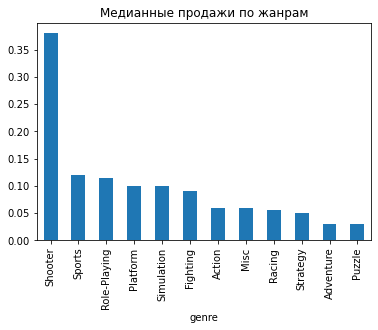

In [70]:
df_for_research.groupby('genre')['tot_sales'].median().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Медианные продажи по жанрам')
plt.show()

**Выводы**

Самыми продаваемыми являются игры жанров Shooter, Sports и RPG, а самые низкие продажи в жанрах Puzzle, Adventure и Strategy.

### Выводы

На данном этапе мы проанализировали влияние различных критериев на продажи компьютерных игр:
* анализ количества релизов игр в год показал, что данные до 1996 года можно не учитывать в дальнейшем исследовании, так как их достаточно мало, а также дальнейший анализ для прогнозирования продаж на 2017 год мы будем проводить по данным за последние 2 года;
* анализ изменения продаж игр по платформам показал, что в среднем примерно каждые 10 лет появляются новые и исчезают старые платформы, а также мы определили ТОП-5 платформ по продажам в целом;
* с учётом предыдущих исследований определены платформы, на которые следует обратить внимание при планировании продаж на следующий календарный год;
* анализ влияния отзывов пользователей и критиков на количество продаж выявил, что есть отличия по разным платформам;
* на основе влияния жанра игр на продажи также определён ТОП-3 жанров игр (Shooter, Sports и RPG), которые имеют самые высокие продажи.

## Составление портрета пользователя каждого региона

### ТОП-5 популярных платформ в зависимости от региона

In [71]:
# построим сводную таблицу продаж по регионам и платформам за последние 2  года
platform_by_region = (
    df_for_research
    .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .reset_index()
)
# отсортируем по объёму продаж в Северной Америке
platform_by_region.sort_values(by='na_sales', ascending=False, inplace=True)
platform_by_region.head(5)

,platform,eu_sales,jp_sales,na_sales
3,PS4,83.54,12.05,63.86
9,XOne,28.10,0.18,50.30
0,3DS,7.39,23.55,10.31
7,WiiU,6.49,4.12,8.86
8,X360,4.21,0.00,8.05


In [72]:
# построим график для большей наглядности
trace0 = go.Bar(
    x=platform_by_region.platform,
    y=platform_by_region.eu_sales,
    name='eu_sales',
    orientation = 'v'
)

trace1 = go.Bar(
    x=platform_by_region.platform,
    y=platform_by_region.jp_sales,
    name='jp_sales',
    orientation = 'v'
)

trace2 = go.Bar(
    x=platform_by_region.platform,
    y=platform_by_region.na_sales,
    name='na_sales',
    orientation = 'v'
)

data = [trace0, trace1, trace2]
layout = {'title': 'Sales share', 'xaxis': {'title': 'platform'}}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

**Выводы**

Как видно из графика ТОП-5 платформ отличается в зависимости от региона:
* для Северной Америки это - PS4, XOne, 3DS, WiiU и X360 (в порядке убывания);
* для Европы - PS4, XOne, PC, 3DS и PS3;
* для Японии - 3DS, PS4, PSV, PS3 и WiiU.

Список платформ похож, но отличаются доли продаж по ним и в Европе более популярны игры на PC, а в Японии - на PSV. Для всех трёх регионов в ТОП-5 входят платформы PS4 и 3DS.

### ТОП-5 популярных жанров в зависимости от региона

In [73]:
# построим сводную таблицу продаж по регионам и жанрам за последние 2 года
genre_by_region = (
    df_for_research
    .pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='median')
    .reset_index()
)
# отсортируем по объёму продаж в Северной Америке
genre_by_region.sort_values(by='na_sales', ascending=False, inplace=True)
genre_by_region.head(5)

,genre,eu_sales,jp_sales,na_sales
8,Shooter,0.15,0.00,0.17
4,Platform,0.04,0.00,0.05
10,Sports,0.05,0.00,0.04
2,Fighting,0.03,0.03,0.03
3,Misc,0.00,0.02,0.01


In [74]:
# построим график для большей наглядности
trace0 = go.Bar(
    x=genre_by_region.genre,
    y=genre_by_region.eu_sales,
    name='eu_sales',
    orientation = 'v'
)

trace1 = go.Bar(
    x=genre_by_region.genre,
    y=genre_by_region.jp_sales,
    name='jp_sales',
    orientation = 'v'
)

trace2 = go.Bar(
    x=genre_by_region.genre,
    y=genre_by_region.na_sales,
    name='na_sales',
    orientation = 'v'
)

data = [trace0, trace1, trace2]
layout = {'title': 'Sales share', 'xaxis': {'title': 'genre'}}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

**Выводы**

Как видно из графика ТОП-5 жанров также отличается в зависимости от региона:
* для Северной Америки это - Shooter, Platform, Sports, Fighting и Role-Playing, Misc (в порядке убывания);
* для Европы - Shooter, Sports, Racing, Strategy и Platform;
* для Японии - Role-Playing, Fighting, Misc, Action, Puzzle и Adventure.

В отношении жанров предпочтения пользователей отличаются в зависимости от регионов. Для Европы и Северной Америки в ТОП-5 входят жанры Shooter, Sports и Platform, у Японии совсем другой список - Role-Playing, Fighting и Misc.

### Влияние рейтинга ESRB на продажи в зависимости от региона

In [75]:
# построим сводную таблицу продаж по регионам и рейтингам ESRB, возьмём данные за 2 года
rating_by_region = (
    df_for_research
    .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .reset_index()
)
# отсортируем по объёму продаж в Северной Америке
rating_by_region.sort_values(by='na_sales', ascending=False, inplace=True)
rating_by_region

,rating,eu_sales,jp_sales,na_sales
2,M,45.54,4.29,47.03
3,NO,35.71,32.89,37.44
0,E,34.83,5.25,26.59
4,T,20.32,7.70,22.86
1,E10+,11.54,3.27,17.87


In [76]:
# построим график для большей наглядности
trace0 = go.Bar(
    x=rating_by_region.rating,
    y=rating_by_region.eu_sales,
    name='eu_sales',
    orientation = 'v'
)

trace1 = go.Bar(
    x=rating_by_region.rating,
    y=rating_by_region.jp_sales,
    name='jp_sales',
    orientation = 'v'
)

trace2 = go.Bar(
    x=rating_by_region.rating,
    y=rating_by_region.na_sales,
    name='na_sales',
    orientation = 'v'
)

data = [trace0, trace1, trace2]
layout = {'title': 'Sales share', 'xaxis': {'title': 'rating'}}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

**Выводы**

По графику видно, что во всех регионах достаточно большое количество продаж игр без рейтинга ESRB. По остальным категориям видим, что в Северной Америке и Европе примерно одиноковые доли продаж по одинаковым рейтингам, самые большие продажи в категории М. В Японии больше всего продаж после игр без рейтингов в категории Т.

### Выводы

На данном этапе мы проанализировали пользовательские портреты каждого региона и выявили, что:
* ТОП-5 популярных платформ примерно одинаковый, но отличаются доли продаж по ним и в Европе более популярны игры на PC, а в Японии - на PSV, для всех трёх регионов в ТОП-5 входят платформы PS4 и 3DS;
* ТОП-5 популярных жанров отличается по долям продаж, для всех трёх регионов в ТОП-5 входят жанры Shooter, Action и Role-Playing;
* по рейтингам ESRB набольшее количество продаж приходится на игры без рейтинга, при этом в Северной Америке и Европе самые большие продажи в категории М, а в Японии больше всего продаж после игр без рейтингов в категории Т.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:
* H0: Средние пользовательские рейтинги платформ Xbox One и PC равны;
* H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Используем метод scipy.stats.ttest_ind(), проверим размер выборок платформ Xbox One и PC и дисперсии рейтингов для того чтобы принять решение о значении параметра equal_var.

In [77]:
# сначала сохраним данные по платформам Xbox One и PC в отдельных переменных
XOne = df_for_research.query('platform == "XOne"').copy().reset_index()
PC = df_for_research.query('platform == "PC"').copy().reset_index()

При обработке пропусков, мы заменили пропуски в столбце `user_score` на служебное значение -1, уберём их из таблицы.

In [78]:
XOne = XOne.query('user_score != -1.0')
PC = PC.query('user_score != -1.0')

In [79]:
print('Размер выборки рейтингов игр на Xbox One:', len(XOne))
print('Размер выборки рейтингов игр на PC:', len(PC))

Размер выборки рейтингов игр на Xbox One: 121
Размер выборки рейтингов игр на PC: 84


In [80]:
# установим ddof=1, так как нам неизвестна полнота данных
variance_estimate_xone = np.var(XOne['user_score'], ddof=1)
variance_estimate_pc = np.var(PC['user_score'], ddof=1)
print('Дисперсия рейтингов игр на Xbox One:', variance_estimate_xone)
print('Дисперсия рейтингов игр на PC:', variance_estimate_pc)

Дисперсия рейтингов игр на Xbox One: 2.1257920110192843
Дисперсия рейтингов игр на PC: 3.1109509466437166


Так как размеры выборок разные и дисперсии не равны, устанавливаем значение параметра equal_var = False.

In [81]:
# проверка гипотезы
# зададим критический уровень статистической значимости, если p-value окажется меньше него - отвегнем гипотезу
alpha = .01

results = st.ttest_ind(
    XOne['user_score'], 
    PC['user_score'],
    equal_var = False
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


На основании полученных данных не можем отклонить нулевую гипотезу. Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно порядка 29%. Это достаточно большая вероятность, чтобы делать вывод о значимом различии между значениями пользовательских рейтингов платформ Xbox One и PC.

**Выводы**

Гипотеза средние пользовательские рейтинги платформ Xbox One и PC одинаковые подтвердилась.

### Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую и альтернативную гипотезы:
* H0: Средние пользовательские рейтинги жанров Action и Sports равны;
* H1: Средние пользовательские рейтинги жанров Action и Sports не равны.

Используем метод scipy.stats.ttest_ind(), проверим размер выборок жанров Action и Sports и дисперсии рейтингов для того чтобы принять решение о значении параметра equal_var.

In [82]:
# сначала сохраним данные по жанрам Action и Sports в отдельных переменных
action = df_for_research.query('genre == "Action"').copy().reset_index()
sports = df_for_research.query('genre == "Sports"').copy().reset_index()

При обработке пропусков, мы заменили пропуски в столбце `user_score` на служебное значение -1, уберём их из таблицы.

In [83]:
action = action.query('user_score != -1.0')
sports = sports.query('user_score != -1.0')

In [84]:
print('Размер выборки рейтингов жанра Action:', len(action))
print('Размер выборки рейтингов жанра Sports:', len(sports))

Размер выборки рейтингов жанра Action: 193
Размер выборки рейтингов жанра Sports: 82


In [85]:
# установим ddof=1, так как нам неизвестна полнота данных
variance_estimate_action = np.var(action['user_score'], ddof=1)
variance_estimate_sports = np.var(sports['user_score'], ddof=1)
print('Дисперсия рейтингов игр жанра Action:', variance_estimate_action)
print('Дисперсия рейтингов игр жанра Sports:', variance_estimate_sports)

Дисперсия рейтингов игр жанра Action: 1.813055915371331
Дисперсия рейтингов игр жанра Sports: 3.8724676302318572


Так как размеры выборок разные и дисперсии не равны, устанавливаем значение параметра equal_var = False.

In [86]:
# проверка гипотезы
# зададим критический уровень статистической значимости, если p-value окажется меньше него - отвегнем гипотезу
alpha = .01

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'],
    equal_var = False
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  5.97163549920592e-10
Отвергаем нулевую гипотезу


На основании полученных данных отклоняем нулевую гипотезу. Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно почти порядка 5*10^-10%. Это очень маленькая вероятность, чтобы делать вывод о том, что рейтинги жанров Action и Sports равны.

**Выводы**

Гипотеза средние пользовательские рейтинги жанров Action и Sports разные подтвердилась.

### Выводы

На данном этапе мы проверили 2 гипотезы:
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* средние пользовательские рейтинги жанров Action и Sports разные.

Обе гипотезы подтвердились.

## Общий вывод

Исследование проводилось в пять этапов:
 1. На этапе Обзор данных мы ознакомились с данными в предоставленной таблице, обнаружили пропуски, некоректные названия столбцов, определили дальнейший план обработки данных и зафиксировали, что предварительно данных для проведения исследования достаточно;
 2. На этапе Предобработка данных мы исправили названия столбцов в соответствие с хооршим стилем, обработали и заполнили строки, изменили формат данных для удобства работы с данными в последующем и рассчитали суммарные продажи по всем странам;
 3. На этапе Исследовательский анализ данных мы проанализировали:
     * количество выпускаемых игр в год и определили, что  данные за период до 1996 год не являются показательными, так как количество выпускаемых игр в этот период гораздо ниже, чем после него, а также решили для прогнозирования продаж на 2017 год использовать данные 2х предыдущих лет;
     * изменение продаж игр по платформам и выявили, что в среднем примерно каждые 10 лет появляются новые и исчезают старые платформы, также определили ТОП-5 платформ по количеству продаж за всё время наблюдений: PS2, X360, PS3, Wii, DS и список платформ, которые будут активно продаваться в следующем календарном году: PS4, XOne и 3DS;
     * продажи игр в разбивке по платформам и ещё раз подтвердили список платформ для продвижения на следующий календарный год;
     * влияние отзывов пользователей и критиков на продажи и выявили разную корреляцию в зависимости от платформы: на платформах PS4 и XOne есть влияние рейтинга критиков на продажи и почти нет никакого влияния рейтинга пользователей, а на платформе 3DS оба рейтинга влияют на продажи, при чём рейтинг пользователей влияет в большей степени;
     * влияние жанров игр на продажи - самыми продаваемыми являются игры жанров Shooter, Sports и RPG;
 4. На этапе Составление портрета пользователя каждого региона мы опредедли:
     * ТОП-5 популярных платформ в зависимости от региона: список платформ похож, но отличаются доли продаж по ним и в Европе более популярны игры на PC, а в Японии - на PSV, для всех трёх регионов в ТОП-5 входят платформы PS4 и 3DS;
     * ТОП-5 популярных жанров в зависимости от региона: для Европы и Северной Америки в ТОП-5 входят жанры Shooter, Sports и Platform, у Японии совсем другой список - Role-Playing, Fighting и Misc;
     * по рейтингам ESRB набольшее количество продаж приходится на игры без рейтинга, при этом в Северной Америке и Европе самые большие продажи в категории М, а в Японии больше всего продаж после игр без рейтингов в категории Т;
 5. На этапе Проверка гипотез было проверено две гипотезы:
     * гипотеза средние пользовательские рейтинги платформ Xbox One и PC одинаковые - подтвердилась;
     * гипотеза средние пользовательские рейтинги жанров Action и Sports разные - подтвердилась.

На основании результатов исследования при выборе потенциально популярных продуктов и планировании рекламных кампаний интернет-магазина «Стримчик» на 2017 год стоит обратить внимание на платформы PS4, XOne и 3DS и игры жанров Shooter, Sports и Platform для Европы и Северной Америки и Role-Playing, Fighting для региона Япония. Также при выборе продукта для продвижения необходимо учитывать отзывы пользователей и критиков в зависимости от платформы и выбирать игры с высокими рейтингами критиков для платформ PS4, XOne и с высокими рейтингами пользователй для платформы 3DS, по рейтингам ESRB набольшее количество продаж приходится на игры без рейтинга.